<div align="right">
Massimo Nocentini<br>
<br>September 8, 2016: big bang
</div>
<br>
<div align="center">
<b>Abstract</b><br>
This document describe our effort to perform mining techniques on the [OEIS][oeis].
</div>

[oeis]:http://oeis.org

**Imports**

The following cell import the function `oeis_search` in order to query the *Online Encyclopedia of Integer Sequences* and render search results directly in the current notebook; for a detailed tutorial, see http://nbviewer.jupyter.org/github/massimo-nocentini/competitive-programming/blob/master/tutorials/oeis-interaction.ipynb?flush_cache=true

In [146]:
from oeis import oeis_search

Follows `import`s required by this document.

In [147]:
from requests import get
import re
from itertools import count
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

# Sandbox

In [177]:
def oeis_graph(seq_id, depth=2):
        
    sink = {}
    
    def recursion(seq_id, step):
        
        payload = {"fmt": "json", "q": "id:A{:06d}".format(seq_id)}
        doc_result = get("https://oeis.org/search", params=payload,)
        doc = doc_result.json()
        result = doc['results'].pop()

        sink.update({seq_id: result})

        # preparing for recursion
        xrefs = result['xref'][:10] if 'xref' in result else []

        cross_references = set()
        regex = re.compile('(?P<id>A\d{6,6})')
        for xref in xrefs:
            cross_references |= set(int(r[1:]) for r in regex.findall(xref))

        result['xref_as_set'] = cross_references
        print("\ncross references of sequence id {}:\n{} ".format(seq_id, cross_references))
            
        if step < depth:
            for i, ref_seq_id in zip(count(), filter(lambda cr: cr not in sink, cross_references)):
                if i > 4: break
                recursion(ref_seq_id, step+1)
        
    recursion(seq_id, step=0)
    
    return sink


In [178]:
graph = oeis_graph(seq_id=45, depth=2)


cross references of sequence id 45:
{114690, 36355, 383, 94216, 90888, 152063, 100492, 99731, 254719, 7317, 104597, 101399, 101400, 59929, 1690, 39834, 144152, 157725, 157726, 157727, 288, 157728, 157729, 32, 930, 103323, 37027, 60455, 111006, 22307, 94638, 38575, 3893, 162741, 6327, 109754, 957, 99390, 167616, 322, 3269, 262342, 71, 1611, 249548, 48887, 74829, 105809, 109906, 213, 20695, 27926, 114197, 91867, 20701, 60441, 738, 101220, 105317, 744, 30186, 228074, 108, 118654, 234357, 57078, 1911, 92921, 94718, 71679} 

cross references of sequence id 114690:
{45, 5773, 1006, 114655} 

cross references of sequence id 5773:
{54393, 158973, 1700, 108, 1006, 5775, 2426, 132814, 245455, 136787, 57682, 5717, 5043, 54391, 54392, 62105, 55898, 26300, 1405, 38622} 

cross references of sequence id 1006:
{26945, 64645, 97862, 64189, 6533, 54726, 6600, 5773, 7569, 178515, 5817, 5717, 258710, 258711, 258712, 7578, 7579, 144218, 182172, 39963, 39964, 6561, 20474, 7971, 86246, 88615, 108, 1006, 99

In [179]:
graph.keys()

dict_keys([114690, 36355, 249413, 94216, 36681, 36682, 12, 5773, 142, 914, 8275, 247192, 114655, 228576, 37027, 228196, 60455, 45, 1006, 90888, 915, 1592, 383])

In [182]:
G=nx.DiGraph()

G.add_nodes_from(graph.keys())

for seq_id, v in graph.items():
    for ref_seq_id in filter(lambda r: r in graph, v['xref_as_set']):
        G.add_edge(seq_id, ref_seq_id)

In [184]:
#G.nodes(), G.edges()

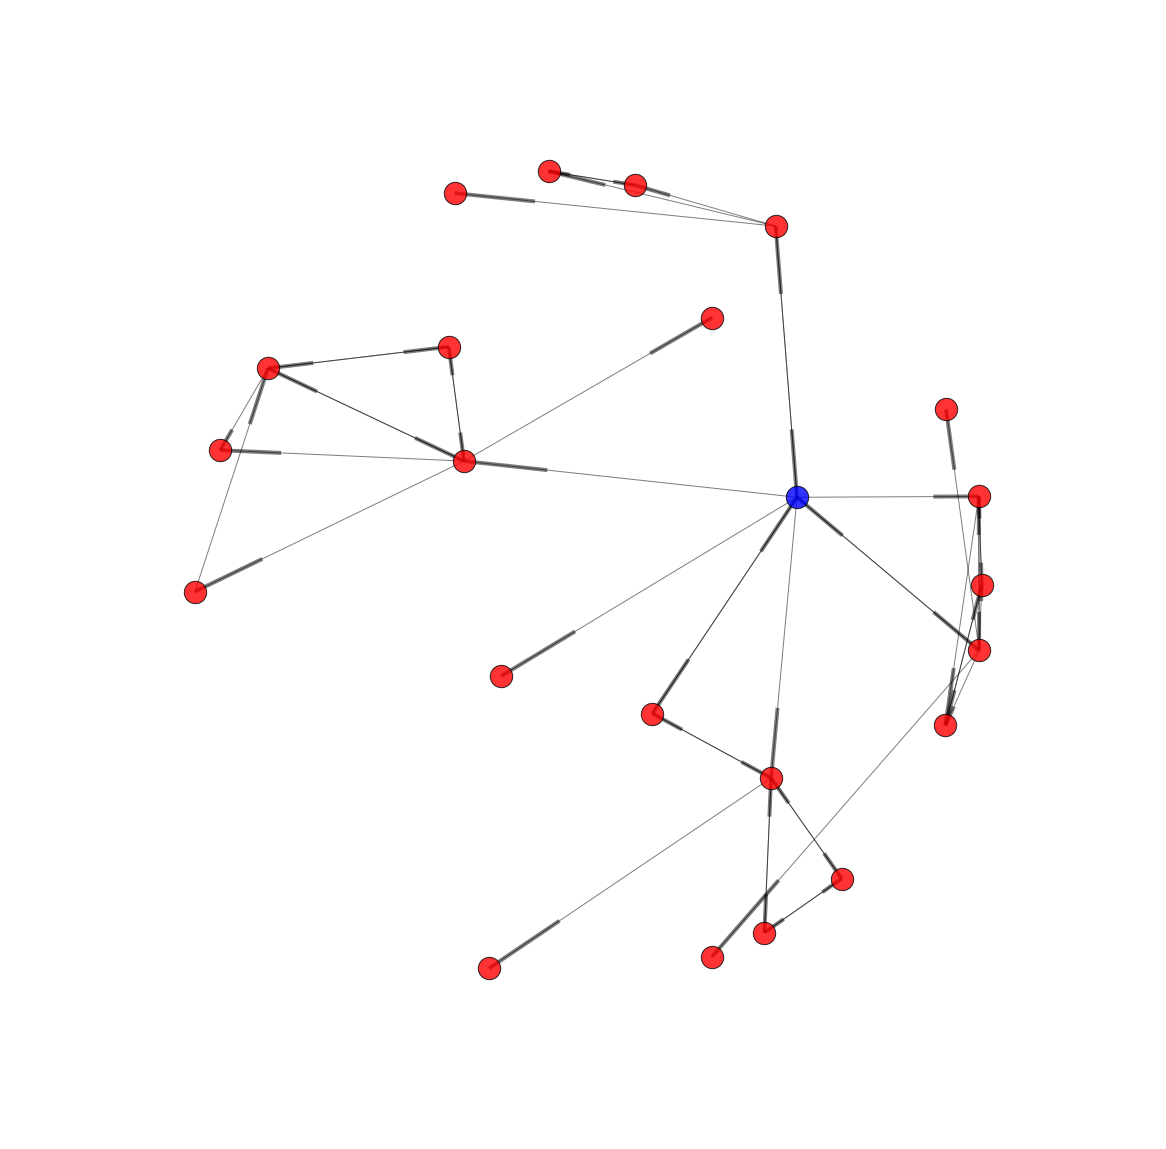

In [185]:
pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,
                       nodelist=[45],
                       node_color='b',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_nodes(G,pos,
                       nodelist=set(graph.keys())-set([45]),
                       node_color='r',
                       node_size=500,
                   alpha=0.8)
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5)
plt.axis('off')
plt.show() # display

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.